<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Alumnos**

Gabriel Ortega Ibarra 201573580-8

Benjamín Rquelme Salinas 201573507-7
 
<hr style="height:2px;border:none"/>

<a id="segundo"></a>
## 2. Job Salary Prediction

En esta sección se trabajará con el problema de predecir el salario que ofrece un anuncio en internet a través unicamente del texto del anuncio. El dataset es ofrecido por *Adzuna* como una competencia en la plataforma más grande de *data science* Kaggle, a través del siguiente __[link](https://www.kaggle.com/c/job-salary-prediction)__. El objetivo de la competencia, según *Adzuna*, es el de tener un motor que pueda predecir el salario de cualquier anuncio de trabajo en Reunio Unido, para poder mejorar la experiencia de los usuarios que buscan trabajos, ya que así pueden filtrar sin que el mismo empleador señale explícitamente cuánto paga.

<img src="http://s5047.pcdn.co/wp-content/uploads/2013/05/salary-prediction-engine-v2.png" title="Title text" width="50%"/>

La métrica de evaluación de la competencia es MAE (*mean absolute error*):

$$
L = \frac{1}{N} \sum_i^N  \mid y_i - \hat{y}_i \mid
$$


Para descargar los datos a utilizar (*Train_rev1*) debe estar registrado en la plataforma de Kaggle. Se cuenta con cientos de miles registros con textos sin procesar, es decir, no están estructurados.
> a) Cargue los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?  

In [1]:
import pandas as pd
df = pd.read_csv("Train_rev1.csv")
df_train = df.iloc[:-10000]
df_val = df.iloc[-10000:]
print("Dimension dataset original: {0}".format(df.shape))
print("Dimension dataset de entrenamiento: {0}".format(df_train.shape))
print("Dimension dataset de prueba: {0}".format(df_val.shape))
df.head()

Dimension dataset original: (244768, 12)
Dimension dataset de entrenamiento: (234768, 12)
Dimension dataset de prueba: (10000, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


Al crear los conjuntos de datos se tiene que el conjunto de entrenamiento cuenta con 234768 datos y el conjunto de prueba cuenta con 10000. Se tienen 12 columnas de las cuales nos interesa "FullDescription" que corresponde a la descripción del anuncio y "SalaryNormalized" que corresponde al salario normalizado correspondiente al trabajo, como se puede ver en el *preview* del dataset (ver columna: SalaryRaw) se puede intuir que el salario normalizado corresponde al promedio de los extremos del intervalo del sueldo a pagar.

In [2]:
#Creacion tabla valores únicos
diccio = {}
for nombre in list(df):
    diccio[nombre] = len(df[nombre].unique())

tabla = pd.DataFrame(data=diccio,index=[0])
tabla.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,244768,135436,242138,20986,2732,3,3,20813,29,97286,8454,168


La tabla anterior representa cuantos campos únicos hay por cada columna. A continuación se presenta otra tabla con los 3 valores presentes en el tipo de contrato y en el tiempo de contrato. Luego se presentarán la cantidad de anuncios por categoría para tener una mayor comprensión de lo que se encuentra en el conjunto de datos y finalmente se hará un histograma para ver la distribución de los salarios.

In [3]:
diccio2 = {"Contrato": df["ContractType"].unique(), "Tiempo Contrato": df["ContractTime"].unique()}
tabla2 = pd.DataFrame(data=diccio2)
tabla2

,Contrato,Tiempo Contrato
0,NaN,permanent
1,full_time,NaN
2,part_time,contract


In [4]:
print("Cantidad de Anuncios por categoria")
df["Category"].value_counts()

Cantidad de Anuncios por categoria


IT Jobs                             38483
Engineering Jobs                    25174
Accounting & Finance Jobs           21846
Healthcare & Nursing Jobs           21076
Sales Jobs                          17272
Other/General Jobs                  17055
Teaching Jobs                       12637
Hospitality & Catering Jobs         11351
PR, Advertising & Marketing Jobs     8854
Trade & Construction Jobs            8837
HR & Recruitment Jobs                7713
Admin Jobs                           7614
Retail Jobs                          6584
Customer Services Jobs               6063
Legal Jobs                           3939
Manufacturing Jobs                   3765
Logistics & Warehouse Jobs           3633
Social work Jobs                     3455
Consultancy Jobs                     3263
Travel Jobs                          3126
Scientific & QA Jobs                 2489
Charity & Voluntary Jobs             2332
Energy, Oil & Gas Jobs               2255
Creative & Design Jobs            

Salario máximo: 200000
Salario mínimo: 5000


Text(0.5,1,'Histograma de los salarios normalizados')

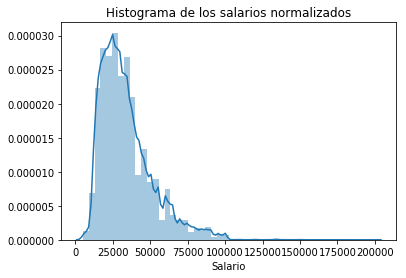

In [5]:
#Trabajo con Salarios
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #esto es para que no salgan los warnings de matplotlib
print("Salario máximo: {0}".format(max(df["SalaryNormalized"])))
print("Salario mínimo: {0}".format(min(df["SalaryNormalized"])))
%matplotlib inline
sns.distplot(df["SalaryNormalized"], axlabel = "Salario").set_title("Histograma de los salarios normalizados")

En base al trabajo realizado es posible describir el set de datos de mejor manera. El conjunto de datos corresponde a diferentes anuncios en 29 categorías distintas, trabajos de Ingeniería y de IT son los más necesitados ya que tienen una mayor cantidad de anuncios asociados, no así como los trabajos Part Time. 

Los tipos de trabajos que podemos encontrar son tiempo completo y part-time, ademas a estos se les asocia un contrato que puede ser: 

* Contrato: Es decir por un plazo fijo de tiempo
* Permamente: Se mantendrá trabajando 

Los salarios van de un rango entre 5000 y 200000 dólares anuales, pero como se puede observar en el Histograma de los salarios normalizados, la mayoría de los sueldos se concentran entre los 5000 y 50000 dólares. 

> b) Extraiga los datos de cada conjunto con los que trabajará, el *input* $X$, los textos, y el *output* $Y$, los salarios.

In [6]:
textos_train = df_train["FullDescription"] #Extraccion del texto del dataset de entrenamiento
salarios_train = df_train["SalaryNormalized"] #Extraccion del salario del dataset de entrenamiento
subtext_train = textos_train.iloc[:25000]
subsalario_train = salarios_train.iloc[:25000]

textos_valid = df_val["FullDescription"] #Extraccion del texto del dataset de prueba
salarios_valid = df_val["SalaryNormalized"] #Extraccion del salario del dataset de prueba

> c) Realice un pre-procesamiento a los datos brutos de texto para extraer características y generar la representación de los datos de entrada al modelo $\vec{x}$. Comente sobre lo realizado.

Para filtrar los textos se usará un *lemmatizer* para encontrar el lema de la palabra, además de que mantiene de mejor forma la integridad de esta que un *stemmer*, por ejemplo, con la palabra *saw* un lemmatizer entregaría *see* o *saw* dependiendo del contexto y un stemmer podría retornar *s*

Tambien se utiliza una expresión regular para corregir algún typo que pueda haber sido producido tres letras iguales o mas en el anuncio, debido al léxico del idioma inglés.

**Nota de trabajo al procesar los textos de los anuncios**
Al trabajar el campo de descripción nos dimos cuenta de muchos errores, las palabras no estaban todas separadas, había números juntos con las palabras y además algunas entradas tenían un error asociado al bot que extraía el texto de la fuenta y eso se incluía en el dataset siendo algo que no aporta valor en absoluto a la hora de analizar.

Nuestras medidas fueron:
* Separar las palabras y números 
* No se pudo eliminar los errores porque no eran exactamente iguales, eran extensos y variaban algunas palabras entre ellos por lo que no fue posible encontrar una expresión regular para filtrarlos
* Eliminar espacios múltiples

De antemano sabemos que no será posible tener un buen aprendizaje por todos los errores que no se pueden filtrar, además no se asegura que estos sean los únicos errores, estos fueron encontrados al buscar algunas palabras del vocabulario generado post-vectorización (no se agregarán todos los intentos de vectorización por tiempo, espacio y facilitar la comprensión), es posible que haya más situaciones complejas que no se hayan descubierto en los textos. 

Se adjunta solo 1 imagen de uno de los trabajos anteriores donde se puede apreciar un fragmento de texto *malo*
<img src="./img/fallo.png">

In [7]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
#word_tokenize -> separar el string utilizando los tokens
'''def word_extractor(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english') #diccionario de palabras de inglés 
    text = re.sub(r'([a-z])\1+'         , r'\1\1' , text) #reduce secuencias de 3 o mas de la misma letra a 2. Ortografia ingles
    text = re.sub(r'([A-Z])'            , r' \1'  , text)#agrega espacio si hay una mayuscula dentro de una palabra. Posibles 
                                                   #espacios omitidos
    #se ven afectadas paginas web: text = re.sub(r'(\.|\,|\;|\:|\!|\?)', r'\1 ' , text) #agrega espacio entre signo de puncuacion y siguiente palabra si no existe
    text = re.sub(r'([0-9]+)([a-zA-z]+)', r'\1 \2', text)#agrega espacio en secuencias de numeros unidas a secuencia de letras
    text = re.sub(r'__+'                , r''     , text)#elimina secuencias de 2 o mas guiones bajo
    text = re.sub(r' +'                 , r' '    , text)#reduce secuencias de espacios a largo 1
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words
'''
def word_extractor_rad(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english') #diccionario de palabras de inglés 
    text = re.sub(r'(.*RadEWrongWord.*)', r''     , text)
    text = re.sub(r'([a-z])\1+'         , r'\1\1' , text) #reduce secuencias de 3 o mas de la misma letra a 2. Ortografia ingles
    text = re.sub(r'([A-Z])'            , r' \1'  , text)#agrega espacio si hay una mayuscula dentro de una palabra. Posibles 
                                                         #espacios omitidos
    #se ven afectadas paginas web: text = re.sub(r'(\.|\,|\;|\:|\!|\?)', r'\1 ' , text) #agrega espacio entre signo de puncuacion y siguiente palabra si no existe
    text = re.sub(r'([0-9]+)([a-zA-z]+)', r'\1 \2', text)#agrega espacio en secuencias de numeros unidas a secuencia de letras
    text = re.sub(r'([0-9]+)'           , r''     , text)#ignora números
    text = re.sub(r'(__+)'              , r''     , text)#elimina secuencias de 2 o mas guiones bajo
    text = re.sub(r'( +)'               , r' '    , text)#reduce secuencias de espacios a largo 1
    text = re.sub(r'( experience | work | role | team | working | please | client | skill | within )', r'', text, flags = re.IGNORECASE)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

Antes de hacer el modelo es necesario representar el texto de una forma entendible para este, en este caso, una representación vectorial, para ello se utilizará la librería sklearn. Debido al tiempo de ejecución que se genera al trabajar con todo el conjunto de prueba se utilizará el subconjunto de este que contempla 25000 de los ~234000. 

Utilizando la cell magic %%time se tiene que con estos tamaños de input (25.000 en training y 10.000 en validación) el tiempo es de 2min 12s aproximadamente.

In [8]:
%%time
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#train_procesados = [word_extractor(text) for text in subtext_train]
#valid_procesados = [word_extractor(text) for text in textos_valid]
train_procesados_rad = [word_extractor_rad(text) for text in subtext_train]
valid_procesados_rad = [word_extractor_rad(text) for text in textos_valid]

CPU times: user 4min 9s, sys: 1.39 s, total: 4min 10s
Wall time: 4min 12s


In [9]:
#vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
#vectorizer.fit(np.asarray(train_procesados))
vectorizer_rad = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer_rad.fit(np.asarray(train_procesados_rad))

#features_train = vectorizer.transform(train_procesados) #sparse matrix de las palabras 
#features_val = vectorizer.transform(valid_procesados)
features_train_rad = vectorizer_rad.transform(train_procesados_rad) #sparse matrix de las palabras 
features_val_rad = vectorizer_rad.transform(valid_procesados_rad)

labels_train = np.asarray(subsalario_train.astype(float)) #pasar los labels a un tipo
labels_valid = np.asarray(salarios_valid.astype(float))

#vocab = vectorizer.get_feature_names()
vocab_rad = vectorizer_rad.get_feature_names()

#dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_rad = list(np.array(features_train_rad.sum(axis=0)).reshape(-1,))


In [10]:
#print("Largo del vocabulario: {0}".format(len(vocab)))
print("Largo del vocabulario borrando lineas con error: {0}".format(len(vocab_rad)))
print(len(train_procesados_rad))

Largo del vocabulario borrando lineas con error: 65526
25000


In [11]:
freq = []
for tag, count in zip(vocab_rad, dist_rad):
    freq.append((count, tag))
freq.sort(reverse=True)
for tupl in freq:
    print(tupl)


(11881, 'skill')
(11516, 'opportunity')
(10681, 'candidate')
(10643, 'looking')
(10173, 'service')
(9511, 'company')
(9434, 'business')
(9215, 'excellent')
(8866, 'required')
(8646, 'must')
(8161, 'apply')
(8149, 'successful')
(8090, 'job')
(7922, 'management')
(7902, 'salary')
(7693, 'support')
(7335, 'join')
(7315, 'manager')
(7249, 'development')
(7180, 'level')
(6929, 'team')
(6830, 'new')
(6820, 'need')
(6804, 'based')
(6780, 'time')
(6772, 'client')
(6477, 'training')
(6451, 'position')
(6423, 'high')
(6356, 'also')
(6257, 'ability')
(6232, 'able')
(6231, 'essential')
(6200, 'recruitment')
(6166, 'full')
(6165, 'environment')
(6102, 'including')
(6070, 'part')
(6033, 'customer')
(6030, 'benefit')
(6026, 'communication')
(5990, 'good')
(5963, 'knowledge')
(5952, 'area')
(5926, 'application')
(5904, 'ha')
(5854, 'well')
(5806, 'provide')
(5782, 'role')
(5771, 'experienced')
(5588, 'strong')
(5559, 'leading')
(5511, 'day')
(5427, 'would')
(5346, 'offer')
(5326, 'include')
(5236, 're

(188, 'accessible')
(187, 'tip')
(187, 'thriving')
(187, 'thisor')
(187, 'scheduling')
(187, 'promptly')
(187, 'certified')
(186, 'trial')
(186, 'disciplinary')
(186, 'debt')
(186, 'acute')
(185, 'wednesday')
(185, 'toilet')
(185, 'solve')
(185, 'maker')
(185, 'hungry')
(185, 'ac')
(184, 'shared')
(184, 'rule')
(184, 'preference')
(184, 'log')
(184, 'concern')
(183, 'united')
(183, 'secretary')
(183, 'necessarily')
(183, 'minor')
(183, 'discounted')
(183, 'dedication')
(182, 'visiting')
(182, 'version')
(182, 'thea')
(182, 'determine')
(182, 'bus')
(182, 'anticipated')
(181, 'variance')
(181, 'underlying')
(181, 'light')
(181, 'journey')
(181, 'funded')
(181, 'correctly')
(181, 'confidentiality')
(180, 'submitted')
(180, 'provenin')
(180, 'interviewing')
(180, 'individualised')
(180, 'followed')
(180, 'enviable')
(180, 'delivers')
(180, 'applycall')
(179, 'stunning')
(179, 'sickness')
(179, 'sarah')
(179, 'promotional')
(179, 'door')
(179, 'cleaner')
(179, 'band')
(178, 'utilise')
(178

(57, 'distribute')
(57, 'developmentto')
(57, 'concerning')
(57, 'broadband')
(57, 'bodyshop')
(57, 'attainment')
(57, 'appreciate')
(57, 'alert')
(57, 'adapting')
(56, 'yearly')
(56, 'theleader')
(56, 'systematic')
(56, 'swansea')
(56, 'suggestion')
(56, 'socialrecruitmentin')
(56, 'socialjobs')
(56, 'signal')
(56, 'selenium')
(56, 'secondment')
(56, 'saa')
(56, 'ryan')
(56, 'resourceful')
(56, 'refrigeration')
(56, 'questioning')
(56, 'previousofwith')
(56, 'pregnancy')
(56, 'overwhelming')
(56, 'oversight')
(56, 'optimal')
(56, 'occur')
(56, 'observe')
(56, 'meaningful')
(56, 'inclusion')
(56, 'hemel')
(56, 'greenfield')
(56, 'franchised')
(56, 'finalist')
(56, 'enthusiasticplayer')
(56, 'enfield')
(56, 'compelling')
(56, 'calendar')
(56, 'broader')
(56, 'banner')
(56, 'arising')
(56, 'applies')
(55, 'will')
(55, 'tracheostomy')
(55, 'timesheets')
(55, 'theon')
(55, 'taylor')
(55, 'strictly')
(55, 'steady')
(55, 'stake')
(55, 'stafford')
(55, 'rotational')
(55, 'roadmap')
(55, 'resu

(26, 'centered')
(26, 'catalyst')
(26, 'carein')
(26, 'camera')
(26, 'busyenvironment')
(26, 'boasting')
(26, 'blackpool')
(26, 'auxiliary')
(26, 'attended')
(26, 'aspire')
(26, 'ashford')
(26, 'artwork')
(26, 'approving')
(26, 'andmeetings')
(26, 'advertiser')
(26, 'adopted')
(26, 'adaptation')
(26, 'activities')
(25, 'youwill')
(25, 'wheel')
(25, 'voltage')
(25, 'ventilatoressential')
(25, 'vauxhall')
(25, 'vascular')
(25, 'utilize')
(25, 'upheld')
(25, 'undertakes')
(25, 'trunking')
(25, 'transferable')
(25, 'tomonday')
(25, 'toeffort')
(25, 'threat')
(25, 'thisalso')
(25, 'television')
(25, 'taxation')
(25, 'tariff')
(25, 'tamworth')
(25, 'stratford')
(25, 'stimulation')
(25, 'staffand')
(25, 'spotting')
(25, 'spine')
(25, 'speedy')
(25, 'skype')
(25, 'settle')
(25, 'scunthorpe')
(25, 'salesyou')
(25, 'salesthe')
(25, 'rover')
(25, 'rework')
(25, 'resources')
(25, 'resort')
(25, 'relay')
(25, 'radius')
(25, 'queries')
(25, 'qualitative')
(25, 'preclude')
(25, 'postsend')
(25, 'plan

(15, 'cellar')
(15, 'cashing')
(15, 'cashier')
(15, 'cases')
(15, 'carly')
(15, 'canwith')
(15, 'cancellation')
(15, 'campaigning')
(15, 'buyin')
(15, 'businessa')
(15, 'budgets')
(15, 'broadcasting')
(15, 'bridgend')
(15, 'bracket')
(15, 'bowel')
(15, 'boardroom')
(15, 'bjelan')
(15, 'benefiting')
(15, 'befull')
(15, 'beeby')
(15, 'bean')
(15, 'beacon')
(15, 'barker')
(15, 'badge')
(15, 'backlog')
(15, 'authentication')
(15, 'au')
(15, 'attendingmeetings')
(15, 'aswell')
(15, 'artist')
(15, 'arisenthe')
(15, 'arabia')
(15, 'answerphone')
(15, 'animation')
(15, 'andusing')
(15, 'amwith')
(15, 'all')
(15, 'alecto')
(15, 'administrating')
(15, 'ace')
(15, 'accelerated')
(15, 'academically')
(15, 'absorb')
(14, 'zest')
(14, 'youcontact')
(14, 'xi')
(14, 'woodland')
(14, 'withknowledge')
(14, 'withat')
(14, 'willacross')
(14, 'whmsyorks')
(14, 'washington')
(14, 'walling')
(14, 'volunteering')
(14, 'vitally')
(14, 'visually')
(14, 'victim')
(14, 'vibe')
(14, 'vernon')
(14, 'variedthat')
(1

(10, 'bulletin')
(10, 'brocade')
(10, 'brewery')
(10, 'brace')
(10, 'bottle')
(10, 'bordon')
(10, 'bolster')
(10, 'blind')
(10, 'blackford')
(10, 'bird')
(10, 'betting')
(10, 'betta')
(10, 'beta')
(10, 'benefitting')
(10, 'believing')
(10, 'befits')
(10, 'basedare')
(10, 'banquet')
(10, 'backdays')
(10, 'axapta')
(10, 'awhilst')
(10, 'auditsas')
(10, 'attracted')
(10, 'attempt')
(10, 'attainable')
(10, 'atleast')
(10, 'assuming')
(10, 'assistant_job')
(10, 'assistancethe')
(10, 'assistancecontact')
(10, 'aspirational')
(10, 'artefact')
(10, 'arrow')
(10, 'aretowards')
(10, 'arelationship')
(10, 'areathe')
(10, 'areaswith')
(10, 'appraising')
(10, 'appear')
(10, 'anywithin')
(10, 'annuity')
(10, 'ands')
(10, 'andplayer')
(10, 'andis')
(10, 'andflexibly')
(10, 'andeffectively')
(10, 'ancillaries')
(10, 'analytically')
(10, 'analyst_job')
(10, 'anaesthetist')
(10, 'ambulance')
(10, 'ambiguity')
(10, 'alzheimers')
(10, 'alumnus')
(10, 'alterian')
(10, 'alsoas')
(10, 'alloy')
(10, 'allegis'

(7, 'hoty')
(7, 'hotels')
(7, 'honiton')
(7, 'honeywell')
(7, 'hillingdon')
(7, 'highperforming')
(7, 'highgate')
(7, 'heywood')
(7, 'heldthe')
(7, 'heidi')
(7, 'hayley')
(7, 'haveofto')
(7, 'haveofofon')
(7, 'havefrom')
(7, 'hasworkinga')
(7, 'haswith')
(7, 'hastings')
(7, 'haskell')
(7, 'harrison')
(7, 'harnham')
(7, 'harmonious')
(7, 'harmful')
(7, 'hardwill')
(7, 'hardthey')
(7, 'hardindividuals')
(7, 'happyon')
(7, 'hanging')
(7, 'hairdresser')
(7, 'haemodialysis')
(7, 'h_')
(7, 'gun')
(7, 'growa')
(7, 'groupthe')
(7, 'groupsthe')
(7, 'groom')
(7, 'greatworking')
(7, 'greatspirit')
(7, 'grampian')
(7, 'grail')
(7, 'governed')
(7, 'goto')
(7, 'goods')
(7, 'goodexperience')
(7, 'goaloriented')
(7, 'github')
(7, 'gillinghamlorien')
(7, 'geraint')
(7, 'gent')
(7, 'genomics')
(7, 'genetics')
(7, 'generalistand')
(7, 'gastric')
(7, 'garbage')
(7, 'gan')
(7, 'gallup')
(7, 'gainedwith')
(7, 'gadget')
(7, 'fulfils')
(7, 'fulfillinsurance')
(7, 'ft')
(7, 'fresco')
(7, 'fraudulent')
(7, 'fra

(5, 'scared')
(5, 'scanned')
(5, 'scandinavian')
(5, 'scaler')
(5, 'sameday')
(5, 'salvage')
(5, 'salt')
(5, 'salesso')
(5, 'salesmembers')
(5, 'salesmanager')
(5, 'salesfocused')
(5, 'salesexcellent')
(5, 'salesclosing')
(5, 'sack')
(5, 'royston')
(5, 'royce')
(5, 'rovide')
(5, 'rotor')
(5, 'rosetteis')
(5, 'ror')
(5, 'romeo')
(5, 'rolesa')
(5, 'roisin')
(5, 'robustly')
(5, 'rigourous')
(5, 'richardson')
(5, 'rhythm')
(5, 'rhyl')
(5, 'rhiannon')
(5, 'rewardingyou')
(5, 'revaluation')
(5, 'retrofit')
(5, 'retro')
(5, 'retest')
(5, 'retender')
(5, 'retargeting')
(5, 'retainedare')
(5, 'restructurethe')
(5, 'restorative')
(5, 'responsibilitieswith')
(5, 'responsefivedaysaccept')
(5, 'resistant')
(5, 'resides')
(5, 'residentsa')
(5, 'residencythe')
(5, 'researched')
(5, 'resale')
(5, 'requireof')
(5, 'requirementsagreed')
(5, 'requiredyou')
(5, 'requireda')
(5, 'reproduce')
(5, 'reportsthe')
(5, 'reportingset')
(5, 'reportable')
(5, 'replyworking')
(5, 'replicate')
(5, 'repairand')
(5, 'r

(4, 'refrigerant')
(4, 'refilling')
(4, 'refers')
(4, 'referrals')
(4, 'referencethe')
(4, 'reevesprojectresource')
(4, 'reel')
(4, 'reece')
(4, 'reduces')
(4, 'redirect')
(4, 'redesigning')
(4, 'recyclables')
(4, 'recurrent')
(4, 'recurrence')
(4, 'recuperation')
(4, 'recruitmentwhich')
(4, 'recruitmentdealing')
(4, 'recruitmentas')
(4, 'recruitment_job')
(4, 'recruitingniche')
(4, 'recruitersteam')
(4, 'recoveryincluding')
(4, 'recordon')
(4, 'recordmarketing')
(4, 'recorder')
(4, 'reclaiming')
(4, 'recirculating')
(4, 'reciprocating')
(4, 'recentteaching')
(4, 'recentreferences')
(4, 'recentofwith')
(4, 'recentinwithin')
(4, 'reallocation')
(4, 'reagent')
(4, 'ranorex')
(4, 'radiological')
(4, 'radically')
(4, 'radian')
(4, 'quirk')
(4, 'quillam')
(4, 'quieter')
(4, 'quicklythe')
(4, 'quickest')
(4, 'queriescall')
(4, 'quartile')
(4, 'quantifying')
(4, 'quantification')
(4, 'quantative')
(4, 'qualities')
(4, 'qualitatively')
(4, 'qualifiedwithin')
(4, 'qualifiedgaineda')
(4, 'qualif

(3, 'recombinant')
(3, 'recognisedthe')
(3, 'reciprocal')
(3, 'recieved')
(3, 'receptionmaking')
(3, 'recalibration')
(3, 'rebranding')
(3, 'reaway')
(3, 'reassigned')
(3, 'readingorders')
(3, 'reactivate')
(3, 'rdbms')
(3, 'rcorkettstrgroup')
(3, 'rbootygablerecruitment')
(3, 'raynes')
(3, 'rawtenstall')
(3, 'rawnsley')
(3, 'rationalising')
(3, 'rationalise')
(3, 'rapportdon')
(3, 'randall')
(3, 'rakesh')
(3, 'rainwater')
(3, 'rainham')
(3, 'rain')
(3, 'railbased')
(3, 'rage')
(3, 'raft')
(3, 'radiotherapy')
(3, 'radiographic')
(3, 'radiator')
(3, 'rachaelredrecruitmentsolutions')
(3, 'racecourse')
(3, 'quotations')
(3, 'quire')
(3, 'quickbooks')
(3, 'queriesdon')
(3, 'queriesdo')
(3, 'queensland')
(3, 'queensbury')
(3, 'quarantine')
(3, 'quants')
(3, 'quantified')
(3, 'qualys')
(3, 'qualitywith')
(3, 'qualityis')
(3, 'qualityfocused')
(3, 'qualifiedworking')
(3, 'qualifiedleaders')
(3, 'qualifieda')
(3, 'qualificationwith')
(3, 'qualificationsof')
(3, 'qualificationsnursing')
(3, 'qu

(2, 'wrekin')
(2, 'wp')
(2, 'wouldas')
(2, 'wotton')
(2, 'worthiness')
(2, 'worthfor')
(2, 'worrallgappersonnel')
(2, 'wormley')
(2, 'worlingham')
(2, 'worldrecognised')
(2, 'worldfinance')
(2, 'worldclassthrough')
(2, 'workwisepersonnel')
(2, 'workwinning')
(2, 'worktogo')
(2, 'workshopand')
(2, 'worksclear')
(2, 'workschallenging')
(2, 'workpiece')
(2, 'workon')
(2, 'workloada')
(2, 'workinprogress')
(2, 'workingin')
(2, 'workin')
(2, 'workgroup')
(2, 'workflows')
(2, 'workerwill')
(2, 'workerin')
(2, 'workerclick')
(2, 'workedfinancial')
(2, 'workdaywith')
(2, 'workday')
(2, 'workbasedof')
(2, 'workaround')
(2, 'words')
(2, 'worded')
(2, 'worchester')
(2, 'wor')
(2, 'woodwardgappersonnel')
(2, 'woodward')
(2, 'woodhays')
(2, 'wooded')
(2, 'woodcock')
(2, 'wonderware')
(2, 'womenan')
(2, 'wombourne')
(2, 'wolverton')
(2, 'woakes')
(2, 'wlv')
(2, 'witth')
(2, 'withworkingan')
(2, 'withtesting')
(2, 'withteach')
(2, 'withsetting')
(2, 'withselling')
(2, 'withsectors')
(2, 'withs')
(2, 

(2, 'planningfor')
(2, 'planningfast')
(2, 'planningacross')
(2, 'planners')
(2, 'planload')
(2, 'planed')
(2, 'planbase')
(2, 'plaese')
(2, 'placesto')
(2, 'placesforpeople')
(2, 'placementsanother')
(2, 'placedthe')
(2, 'placeawith')
(2, 'pla')
(2, 'pknowledge')
(2, 'pizzeria')
(2, 'pivotalwhere')
(2, 'pivotaland')
(2, 'pivitol')
(2, 'pitt')
(2, 'pitcher')
(2, 'pipesizing')
(2, 'pipefitting')
(2, 'pipefitter')
(2, 'pint')
(2, 'pinnacle')
(2, 'pinkneys')
(2, 'pinbr')
(2, 'piloting')
(2, 'pilkington')
(2, 'piecewhere')
(2, 'picnic')
(2, 'pickupin')
(2, 'pickin')
(2, 'pickering')
(2, 'pic')
(2, 'piano')
(2, 'physikalische')
(2, 'physicaland')
(2, 'phusion')
(2, 'photocopy')
(2, 'phonein')
(2, 'phobl')
(2, 'pho')
(2, 'philosopher')
(2, 'philanthropy')
(2, 'phd')
(2, 'pharmacytoday')
(2, 'pharmacyg')
(2, 'pharmacology')
(2, 'pharm')
(2, 'pg')
(2, 'pfor')
(2, 'petition')
(2, 'petherton')
(2, 'peterson')
(2, 'peternow')
(2, 'peta')
(2, 'pervious')
(2, 'pervade')
(2, 'peruse')
(2, 'peru')
(2

(2, 'happyweekends')
(2, 'happyto')
(2, 'happyindependently')
(2, 'happiest')
(2, 'handsonworking')
(2, 'handsonwithin')
(2, 'handsonthat')
(2, 'handsonon')
(2, 'handsone')
(2, 'handsomely')
(2, 'handsome')
(2, 'handrail')
(2, 'handout')
(2, 'handicap')
(2, 'handcoding')
(2, 'hampshirein')
(2, 'hammondrecruitment')
(2, 'hammerton')
(2, 'hammer')
(2, 'hamburg')
(2, 'hallxcellin')
(2, 'halifaxthis')
(2, 'hail')
(2, 'hagger')
(2, 'haemodynamics')
(2, 'haemodialysisat')
(2, 'hadofwith')
(2, 'hadofin')
(2, 'hadexperience')
(2, 'haddisonfowle')
(2, 'hadacross')
(2, 'hacking')
(2, 'hackett')
(2, 'haccp')
(2, 'gywmind')
(2, 'gyrrwr')
(2, 'gynnal')
(2, 'gymslondon')
(2, 'gymnastics')
(2, 'gwybodaeth')
(2, 'gwsmeriaid')
(2, 'gwill')
(2, 'gwasanaethau')
(2, 'guttering')
(2, 'gute')
(2, 'gusto')
(2, 'gurneynovouk')
(2, 'guoman')
(2, 'gunton')
(2, 'guise')
(2, 'guinness')
(2, 'guides')
(2, 'guidence')
(2, 'guglielmi')
(2, 'guestsfood')
(2, 'guests')
(2, 'guestand')
(2, 'guarenteed')
(2, 'guaranteed

(2, 'chatteris')
(2, 'chaser')
(2, 'charted')
(2, 'charnwood')
(2, 'charliejustsearchgroup')
(2, 'charlene')
(2, 'charitycharity')
(2, 'charities')
(2, 'charitableof')
(2, 'charcoal')
(2, 'characterized')
(2, 'characterise')
(2, 'char')
(2, 'chant')
(2, 'channelto')
(2, 'changingpriorities')
(2, 'changingpressures')
(2, 'changeyourthe')
(2, 'changeworkinga')
(2, 'changein')
(2, 'changeand')
(2, 'changeable')
(2, 'chancen')
(2, 'chameleon')
(2, 'challengingplease')
(2, 'challengingof')
(2, 'challengingis')
(2, 'challengingdemands')
(2, 'challengingbut')
(2, 'challengingas')
(2, 'challengeyour')
(2, 'challengethe')
(2, 'cgi')
(2, 'certificationof')
(2, 'ceri')
(2, 'ceredigion')
(2, 'centurion')
(2, 'centum')
(2, 'centrifuge')
(2, 'centrifugal')
(2, 'centreworking')
(2, 'centrepiece')
(2, 'centreon')
(2, 'centreleader')
(2, 'centrecare')
(2, 'centre_job')
(2, 'centralthat')
(2, 'centralising')
(2, 'centralisation')
(2, 'centersbrbr')
(2, 'cementing')
(2, 'celine')
(2, 'cc')
(2, 'caxton')


(1, 'wth')
(1, 'wswpconsulting')
(1, 'wswith')
(1, 'wsmith')
(1, 'wsgi')
(1, 'wrthych')
(1, 'writtenplayer')
(1, 'writtenis')
(1, 'writtenincluding')
(1, 'writtendealing')
(1, 'writtenand')
(1, 'writingwith')
(1, 'writingthiswould')
(1, 'writingsend')
(1, 'writingreports')
(1, 'writingoneday')
(1, 'writingofwith')
(1, 'writingoff')
(1, 'writingnote')
(1, 'writingno')
(1, 'writinginstructions')
(1, 'writingfoundation')
(1, 'writingfixed')
(1, 'writinga')
(1, 'writersas')
(1, 'writeron')
(1, 'writer_job')
(1, 'writeoff')
(1, 'writen')
(1, 'writ')
(1, 'wristwith')
(1, 'wrist')
(1, 'wrigleys')
(1, 'wrigley')
(1, 'wrightsnjrecruitment')
(1, 'wrightnorthampton')
(1, 'wrightirweb')
(1, 'wrexhams')
(1, 'wrestlingworth')
(1, 'wren')
(1, 'wrecsam')
(1, 'wraxall')
(1, 'wqrking')
(1, 'wpmknowledge')
(1, 'wpf')
(1, 'wovens')
(1, 'woven')
(1, 'wouldwithin')
(1, 'wouldunder')
(1, 'wouldtowards')
(1, 'wouldto')
(1, 'woulds')
(1, 'wouldofwithin')
(1, 'wouldofin')
(1, 'wouldnt')
(1, 'wouldfor')
(1, 'wou

(1, 'translocation')
(1, 'translationrequirements')
(1, 'translatestreamlevel')
(1, 'translaterequirements')
(1, 'transitionwith')
(1, 'transitionwill')
(1, 'transitionsfor')
(1, 'transitionsflintshire')
(1, 'transitions')
(1, 'transient')
(1, 'transfusion')
(1, 'transformerless')
(1, 'transformationyou')
(1, 'transformationwith')
(1, 'transformationthe')
(1, 'transformationsthe')
(1, 'transformationmanaging')
(1, 'transferto')
(1, 'transferrableincluding')
(1, 'transfering')
(1, 'transferablefromin')
(1, 'transferableexperience')
(1, 'transcriptomic')
(1, 'transcribes')
(1, 'transcranial')
(1, 'transcode')
(1, 'transactionwould')
(1, 'transactionsnegotiating')
(1, 'transactionsand')
(1, 'transactionfor')
(1, 'transactionalwithin')
(1, 'transactionalwith')
(1, 'transactionalor')
(1, 'transactionalin')
(1, 'transactionaland')
(1, 'transacting')
(1, 'tranport')
(1, 'traning')
(1, 'tranformations')
(1, 'tramway')
(1, 'tramp')
(1, 'tralin')
(1, 'trakm')
(1, 'trak')
(1, 'trainthetrainer')
(

(1, 'supervisorcomfortable')
(1, 'supervisorclick')
(1, 'supervisionworking')
(1, 'supervisionwill')
(1, 'supervisions')
(1, 'supervisionof')
(1, 'supervisionis')
(1, 'supervisionapply')
(1, 'supervisingto')
(1, 'supervisingthat')
(1, 'supervisingset')
(1, 'supervisingmembers')
(1, 'supervisingmanager')
(1, 'supervisingand')
(1, 'superviseto')
(1, 'superviseof')
(1, 'superviseda')
(1, 'supervis')
(1, 'supervior')
(1, 'supervening')
(1, 'superusers')
(1, 'superstress')
(1, 'superstorewould')
(1, 'supersales')
(1, 'superrvisor')
(1, 'superquickturn')
(1, 'supernumery')
(1, 'supermarkrt')
(1, 'superlative')
(1, 'superiority')
(1, 'superiorbase')
(1, 'supergen')
(1, 'superfor')
(1, 'superefficient')
(1, 'supercritical')
(1, 'supercreative')
(1, 'supercomputing')
(1, 'supercessions')
(1, 'superbworkingthe')
(1, 'superbwithin')
(1, 'superbtowith')
(1, 'superbthe')
(1, 'superbservice')
(1, 'superbon')
(1, 'superblife')
(1, 'superbis')
(1, 'superbfrom')
(1, 'superbfacing')
(1, 'superbculture')

(1, 'setoperating')
(1, 'setonly')
(1, 'seton')
(1, 'setlovely')
(1, 'setlarge')
(1, 'setit')
(1, 'setextensive')
(1, 'seteither')
(1, 'sessionswith')
(1, 'sessionslocal')
(1, 'sessionsgeographicallyeach')
(1, 'sessionsa')
(1, 'sesiynau')
(1, 'sesame')
(1, 'sery')
(1, 'serviette')
(1, 'servies')
(1, 'servicingto')
(1, 'servicingthe')
(1, 'servicingneeds')
(1, 'servicingin')
(1, 'servicingcontact')
(1, 'servicingaccounts')
(1, 'servicex')
(1, 'servicewithout')
(1, 'servicewill')
(1, 'servicewide')
(1, 'servicewelcome')
(1, 'servicev')
(1, 'serviceunderstand')
(1, 'serviceunder')
(1, 'servicetoin')
(1, 'servicethere')
(1, 'servicetelesaleswould')
(1, 'servicesyou')
(1, 'serviceswella')
(1, 'serviceswakefield')
(1, 'servicesvisit')
(1, 'servicesunderstanding')
(1, 'servicestyping')
(1, 'servicestowards')
(1, 'servicesthese')
(1, 'servicesthendo')
(1, 'servicestarget')
(1, 'servicessupports')
(1, 'servicesstake')
(1, 'servicesselling')
(1, 'servicesresponsible')
(1, 'servicesrequires')
(1,

(1, 'recordoutbound')
(1, 'recordorthopaedics')
(1, 'recordofin')
(1, 'recordof')
(1, 'recordnursing')
(1, 'recordnew')
(1, 'recordmanagement')
(1, 'recordmaintenance')
(1, 'recordlaw')
(1, 'recordlabour')
(1, 'recordkeeping')
(1, 'recordingswith')
(1, 'recordingestablished')
(1, 'recordingdonations')
(1, 'recordfor')
(1, 'recordfeedback')
(1, 'recordeither')
(1, 'recordedsalesforce')
(1, 'recorddata')
(1, 'recordcustomer')
(1, 'recordcorporate')
(1, 'recordcompliance')
(1, 'recordblue')
(1, 'recordas')
(1, 'recordanother')
(1, 'recordand')
(1, 'recordan')
(1, 'recontracting')
(1, 'recontact')
(1, 'reconstructive')
(1, 'reconstitution')
(1, 'reconsilliation')
(1, 'reconnue')
(1, 'reconnaissance')
(1, 'recongnised')
(1, 'reconfiguredtowith')
(1, 'reconfigured')
(1, 'reconfigurable')
(1, 'reconcilliations')
(1, 'reconciliationswithin')
(1, 'reconciliationswith')
(1, 'reconciliationstight')
(1, 'reconciliationsprovenof')
(1, 'reconciliationsmicrosoft')
(1, 'reconciliationsknowledge')
(1, 

(1, 'premeets')
(1, 'premade')
(1, 'prem')
(1, 'prelive')
(1, 'preliminarynecessary')
(1, 'preliminariesthe')
(1, 'prelim')
(1, 'prelet')
(1, 'prejudiced')
(1, 'preissueessential')
(1, 'preimplementation')
(1, 'preidentified')
(1, 'prehug')
(1, 'preg')
(1, 'preforming')
(1, 'preformed')
(1, 'preform')
(1, 'prefferred')
(1, 'prefferedcall')
(1, 'prefferable')
(1, 'prefers')
(1, 'preferredthistraining')
(1, 'preferredset')
(1, 'preferredselling')
(1, 'preferredprocurement')
(1, 'preferredofwith')
(1, 'preferredofon')
(1, 'preferredofin')
(1, 'preferredo')
(1, 'preferrednote')
(1, 'preferredknowledge')
(1, 'preferredis')
(1, 'preferredhours')
(1, 'preferredfromthe')
(1, 'preferreddays')
(1, 'preferredbackground')
(1, 'preferredas')
(1, 'preferredand')
(1, 'preferreda')
(1, 'preferentially')
(1, 'preferencing')
(1, 'preferedl')
(1, 'preferand')
(1, 'preferablyvacant')
(1, 'preferablythere')
(1, 'preferablytheof')
(1, 'preferablyretail')
(1, 'preferablyonline')
(1, 'preferablyofwith')
(1, '

(1, 'organisationa')
(1, 'organi')
(1, 'orgaisation')
(1, 'orgainistion')
(1, 'orgainised')
(1, 'orgainedan')
(1, 'orgained')
(1, 'orfrom')
(1, 'orflats')
(1, 'orfive')
(1, 'orfiles')
(1, 'orfacingis')
(1, 'orfacingan')
(1, 'orfacing')
(1, 'orexperiencethe')
(1, 'orexperienceof')
(1, 'orequivalent')
(1, 'oreasy')
(1, 'oreal')
(1, 'ore')
(1, 'ordisplay')
(1, 'ordisability')
(1, 'ordirectly')
(1, 'ordirect')
(1, 'ordevelopment')
(1, 'ordevelopers')
(1, 'orderwise')
(1, 'orderliness')
(1, 'orderfilling')
(1, 'ordercontact')
(1, 'orderbook')
(1, 'ordained')
(1, 'orcoordinator')
(1, 'orcontact')
(1, 'orcommuting')
(1, 'orclose')
(1, 'orchidgroup')
(1, 'orchid')
(1, 'orchestrating')
(1, 'orchestrated')
(1, 'orchestral')
(1, 'orcandidates')
(1, 'orcad')
(1, 'orbusiness')
(1, 'orbis')
(1, 'orbasis')
(1, 'orashifts')
(1, 'orary')
(1, 'orare')
(1, 'oranother')
(1, 'orangery')
(1, 'oralce')
(1, 'oraexcellent')
(1, 'oracleyour')
(1, 'oracleusing')
(1, 'oraclethis')
(1, 'oraclesend')
(1, 'oracleis'

(1, 'mullinsipsgroup')
(1, 'mullin')
(1, 'mullett')
(1, 'mullen')
(1, 'mulitskilled')
(1, 'mulitmarket')
(1, 'mulitiered')
(1, 'mulithreading')
(1, 'mulhollandquartzhb')
(1, 'mulgrewsrg')
(1, 'mulgrewmatchtech')
(1, 'mule')
(1, 'mulberry')
(1, 'mulbarton')
(1, 'muirhouse')
(1, 'muhammad')
(1, 'mudiwa')
(1, 'muddy')
(1, 'muckin')
(1, 'muchyou')
(1, 'muchto')
(1, 'mu')
(1, 'mtungi')
(1, 'mthswithin')
(1, 'mthodologique')
(1, 'mtbased')
(1, 'msubmit')
(1, 'msbuild')
(1, 'mrsurfacetransforms')
(1, 'mringley')
(1, 'mresponsible')
(1, 'mrequire')
(1, 'mrc')
(1, 'mprovide')
(1, 'mpridhamaktonrecruitment')
(1, 'mpreviousinin')
(1, 'mpreferable')
(1, 'mporary')
(1, 'mpls')
(1, 'mployees')
(1, 'mployability')
(1, 'mplex')
(1, 'mplementing')
(1, 'mp')
(1, 'mozzarella')
(1, 'mozilla')
(1, 'moyes')
(1, 'moxy')
(1, 'mower')
(1, 'mow')
(1, 'movitvated')
(1, 'movingwith')
(1, 'movingforward')
(1, 'moveside')
(1, 'movesend')
(1, 'moves')
(1, 'movementin')
(1, 'movementa')
(1, 'moveins')
(1, 'moveinfor'

(1, 'leadershiplongterm')
(1, 'leadershipk')
(1, 'leadershipissue')
(1, 'leadershipinvaluablefor')
(1, 'leadershipincluding')
(1, 'leadershipif')
(1, 'leadershiphave')
(1, 'leadershiphas')
(1, 'leadershipgaineda')
(1, 'leadershipexperience')
(1, 'leadershipexcellent')
(1, 'leadershipe')
(1, 'leadershipdemonstrable')
(1, 'leadershipdata')
(1, 'leadershipcovering')
(1, 'leadershipby')
(1, 'leadershipbr')
(1, 'leadershipbefore')
(1, 'leadershipas')
(1, 'leadershiparemodels')
(1, 'leadershipare')
(1, 'leadershipagenda')
(1, 'leadersf')
(1, 'leadersb')
(1, 'leaderresponsibilities')
(1, 'leaderrecycling')
(1, 'leaderprofilepurpose')
(1, 'leaderour')
(1, 'leaderor')
(1, 'leadernational')
(1, 'leadermobile')
(1, 'leadermaternitycover_job')
(1, 'leaderis')
(1, 'leaderengland')
(1, 'leaderdesktop')
(1, 'leaderconstruction')
(1, 'leaderbroadcast')
(1, 'leadera')
(1, 'leader_job')
(1, 'leadengagements')
(1, 'leaddriven')
(1, 'leaddata')
(1, 'leadan')
(1, 'leadaims')
(1, 'leadaandcollaboratively')


(1, 'hoursis')
(1, 'hourshours')
(1, 'hoursfrom')
(1, 'hoursevery')
(1, 'hoursemail')
(1, 'hoursdelegated')
(1, 'hoursclosely')
(1, 'hoursbenefits')
(1, 'hourquote')
(1, 'houron')
(1, 'hourofwithin')
(1, 'hourin')
(1, 'hourfor')
(1, 'houremail')
(1, 'hourdescription')
(1, 'hourdays')
(1, 'hourday')
(1, 'hourcontact')
(1, 'hourcall')
(1, 'hourbrbr')
(1, 'hourapply')
(1, 'houraday')
(1, 'houra')
(1, 'houghmonarcheducation')
(1, 'hough')
(1, 'hotwells')
(1, 'hotsurfaces')
(1, 'hotrocketjobs')
(1, 'hotkeys')
(1, 'hotelwould')
(1, 'hotelwith')
(1, 'hoteluniquedining')
(1, 'hoteltheir')
(1, 'hotelsto')
(1, 'hotelsend')
(1, 'hotelsclosely')
(1, 'hotelrequirements')
(1, 'hotelor')
(1, 'hotelin')
(1, 'hotelimmediate_job')
(1, 'hotelas')
(1, 'hote')
(1, 'hosty')
(1, 'hoststaffing')
(1, 'hosts')
(1, 'hostrotas')
(1, 'hostpayroll')
(1, 'hostmembers')
(1, 'hostingto')
(1, 'hostingnbsp')
(1, 'hostesses')
(1, 'hostessdrinksandcanapes_job')
(1, 'hostedservers')
(1, 'hostedour')
(1, 'hostand')
(1, 'hos

(1, 'firstinman')
(1, 'firsthandand')
(1, 'firstever')
(1, 'firstcleaningsolutions')
(1, 'firstclassdrawn')
(1, 'firstchoice')
(1, 'firstauthor')
(1, 'firstat')
(1, 'firstas')
(1, 'firmwith')
(1, 'firmwareyou')
(1, 'firmtraining')
(1, 'firmtheof')
(1, 'firmthe')
(1, 'firmsoft')
(1, 'firms')
(1, 'firmon')
(1, 'firmhistory')
(1, 'firmer')
(1, 'firmenkantine')
(1, 'firma')
(1, 'firm_job')
(1, 'firewallw')
(1, 'firewallsonicwallmc')
(1, 'firewallreasonable')
(1, 'firewalling')
(1, 'fireplace')
(1, 'firepac')
(1, 'firenze')
(1, 'firehorse')
(1, 'firefighter')
(1, 'firebreathing')
(1, 'fireable')
(1, 'fique')
(1, 'fipcor')
(1, 'fiorelli')
(1, 'finshers')
(1, 'finningley')
(1, 'finnegan')
(1, 'finity')
(1, 'finishknowledge')
(1, 'finishingtowithin')
(1, 'finisher_job')
(1, 'finishat')
(1, 'fingerprinting')
(1, 'fingerprint')
(1, 'finetuning')
(1, 'finely')
(1, 'fineis')
(1, 'findto')
(1, 'findingto')
(1, 'findingsu')
(1, 'findingsto')
(1, 'findingon')
(1, 'findingexperience')
(1, 'findat')
(1

(1, 'draughter')
(1, 'drastic')
(1, 'draperyetc')
(1, 'drake')
(1, 'draining')
(1, 'drainagecandidates')
(1, 'dragon')
(1, 'dragdrop')
(1, 'drafty')
(1, 'dqshclplc')
(1, 'dpreferential')
(1, 'dpreferably')
(1, 'dpractices')
(1, 'dpopulusconsultants')
(1, 'dplastic')
(1, 'doxford')
(1, 'downwith')
(1, 'downward')
(1, 'downtown')
(1, 'downton')
(1, 'downto')
(1, 'downrequire')
(1, 'downpatrickrequires')
(1, 'downpatrick')
(1, 'downloadable')
(1, 'downgrade')
(1, 'downareasto')
(1, 'dow')
(1, 'dovisits')
(1, 'dovedale')
(1, 'dovecot')
(1, 'dovaston')
(1, 'dov')
(1, 'doundation')
(1, 'douglasscott')
(1, 'doubtclosely')
(1, 'doubleup')
(1, 'dottedline')
(1, 'dotnetnuke')
(1, 'dotnet')
(1, 'dotgap')
(1, 'dosbarthu')
(1, 'dorsetbrbr')
(1, 'dorsetbased')
(1, 'dorset_job')
(1, 'dorothy')
(1, 'dornay')
(1, 'doreebluepelican')
(1, 'doree')
(1, 'dore')
(1, 'dor')
(1, 'doppler')
(1, 'dopop')
(1, 'doorto')
(1, 'doorstransactional')
(1, 'doorsselling')
(1, 'doorsets')
(1, 'doorset')
(1, 'doors_job')


(1, 'consultingwithin')
(1, 'consultingto')
(1, 'consultingsenior')
(1, 'consultingpreferred')
(1, 'consultingofwith')
(1, 'consultingof')
(1, 'consultingis')
(1, 'consultinginternal')
(1, 'consultingfunctional')
(1, 'consultingexceptional')
(1, 'consultingaon')
(1, 'consultingand')
(1, 'consultinga')
(1, 'consultees')
(1, 'consultativeyou')
(1, 'consultativeto')
(1, 'consultativein')
(1, 'consultativeas')
(1, 'consultationsurgeries')
(1, 'consultationsin')
(1, 'consultations')
(1, 'consultationcontact')
(1, 'consultationand')
(1, 'consultantyouras')
(1, 'consultantyears')
(1, 'consultantwould')
(1, 'consultantworking')
(1, 'consultanttheir')
(1, 'consultantswith')
(1, 'consultantsupplying')
(1, 'consultantstirelessly')
(1, 'consultantstheir')
(1, 'consultantsread')
(1, 'consultantsprofile')
(1, 'consultantsourinvestment')
(1, 'consultantsour')
(1, 'consultantsone')
(1, 'consultantson')
(1, 'consultantsin')
(1, 'consultantsfrom')
(1, 'consultantsfor')
(1, 'consultantsclosely')
(1, 'con

(1, 'bewerben')
(1, 'beweekdays')
(1, 'beveragewith')
(1, 'beveragerespond')
(1, 'beveragemust')
(1, 'beverageis')
(1, 'beveragein')
(1, 'beverageandwith')
(1, 'betwenn')
(1, 'betweenwe')
(1, 'betweensites')
(1, 'betweenset')
(1, 'betweenmy')
(1, 'betweenmembers')
(1, 'betweenleadership')
(1, 'betweenfrom')
(1, 'betweenbetween')
(1, 'betty')
(1, 'betterware')
(1, 'bettering')
(1, 'bettered')
(1, 'betriebliche')
(1, 'bethree')
(1, 'bethnal')
(1, 'bethis')
(1, 'bethau')
(1, 'bethany')
(1, 'besupporting')
(1, 'bestwood')
(1, 'bestwithin')
(1, 'bestto')
(1, 'bestspirits')
(1, 'bestselling')
(1, 'bestreputed')
(1, 'bestprojects')
(1, 'bestow')
(1, 'beston')
(1, 'bestis')
(1, 'bestimproving')
(1, 'bestenvironments')
(1, 'bestconsumer')
(1, 'bessential')
(1, 'besselsleigh')
(1, 'bessacarr')
(1, 'bespokesolutions')
(1, 'bespokescoring')
(1, 'bespokerequirements')
(1, 'bespokemarinepropulsionunits')
(1, 'bespirited')
(1, 'besp')
(1, 'besolely')
(1, 'besmall')
(1, 'besix')
(1, 'besitzen')
(1, 'b

(1, 'administratorwith')
(1, 'administratorswill')
(1, 'administratoror')
(1, 'administratorof')
(1, 'administratorlead')
(1, 'administratorits')
(1, 'administratorincludes')
(1, 'administratorin')
(1, 'administratoressential')
(1, 'administratoremail')
(1, 'administratordescribes')
(1, 'administratorcandidates')
(1, 'administrato')
(1, 'administrativewith')
(1, 'administrativewho')
(1, 'administrativeusing')
(1, 'administrativethrough')
(1, 'administrativethat')
(1, 'administrativerelated')
(1, 'administrativeproficient')
(1, 'administrativelevelsthe')
(1, 'administrativeideallythe')
(1, 'administrativefacingin')
(1, 'administrativeexperience')
(1, 'administrativedesirable')
(1, 'administrativeboth')
(1, 'administrativeas')
(1, 'administrativeandusing')
(1, 'administrativealso')
(1, 'administrativeability')
(1, 'administrativea')
(1, 'administrationyou')
(1, 'administrationworkinga')
(1, 'administrationwho')
(1, 'administrationundertaking')
(1, 'administrationtyping')
(1, 'administrat

Como dato para reafirmar los problemas del dataset, para dominar un idioma es necesario conocer 10.000 palabras de éste, nuestro vocabulario cuenta con 3.5 veces ese valor por lo que creemos que siguen habiendo inconsistencias en el texto post-procesamiento pero que consumiría una cantidad excesiva de tiempo procesar cada situación.

> d) Intente resolver el problema enfrentándolo como regresión con el modelo de regresión lineal ordinaria en *sklearn*. ¿Qué es lo que hace *fit_intercept=True*? Evalúe la función objetivo (F.O.) utilizada y la métrica de la competencia (*mean absolute error*) en ambos conjuntos generados en el punto a). Comente lo observado.
```python
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
    model.fit(feat,y_train)
... #measure F.O.
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(y_train, model.predict(X_train)))
print("MAE on validation: ",mean_absolute_error(y_val, model.predict(X_val)))
```

**IMPORTANTE**
Ejecutar la celda de abajo hará que se tarde 18 minutos el programa en hacer el prodecimiento, para la sección e) se trabaja con un conjunto más acotado de datos ya que además el procedimiento genera MAE's mas bajos en ambos casos. 

In [17]:
%%time
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model.fit(features_train_rad,labels_train)
#measure F.O.
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(labels_train, model.predict(features_train_rad)))
print("MAE on validation: ",mean_absolute_error(labels_valid, model.predict(features_val_rad)))

MAE on train:  105.10367102781201
MAE on validation:  100621.75676701003
CPU times: user 41min 12s, sys: 37.7 s, total: 41min 49s
Wall time: 20min 58s


> e) Intente mejorar sus resultados en base a la métrica de la competencia (MAE) sobre el conjunto de validación. Comente sobre lo realizado.  
*No se le pide que imite los resultados ganadores de la competencia (MAE de 3400), sino que mejore lo ya alcanzado siendo creativo.*

<div class="alert alert-warning"> HINT: Una opción es cambiar el *approach* de resolución desde regresión a casificación o trabajo sobre los datos (tal como limpiarlos).</div>


Debido a que el dataset posee muchos errores se trabajará con un conjunto más pequeño de datos de entrenamiento con la esperanza que se procesen menos datos erróneos y además el programa se ejecute más rápido. Aunque el código estará más compacto que en las secciones anteriores ya que se repetirá exactamente el mismo proceso pero con menos datos solamente.

Tomaremos solamente 1000 datos para entrenar

In [12]:
subtext_train2 = textos_train.iloc[:1000]
subsalario_train2 = salarios_train.iloc[:1000]

In [13]:
%%time
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

train_procesados2 = [word_extractor_rad(text) for text in subtext_train2]
valid_procesados2 = [word_extractor_rad(text) for text in textos_valid]

CPU times: user 1min 21s, sys: 260 ms, total: 1min 22s
Wall time: 1min 22s


In [15]:
vectorizer2 = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer2.fit(np.asarray(train_procesados2))

features_train2 = vectorizer2.transform(train_procesados2) #sparse matrix de las palabras 
features_val2 = vectorizer2.transform(valid_procesados2)

labels_train2 = np.asarray(subsalario_train2.astype(float)) #pasar los labels a un tipo
labels_valid2 = np.asarray(salarios_valid.astype(float))

vocab2 = vectorizer2.get_feature_names()
dist = list(np.array(features_train2.sum(axis=0)).reshape(-1,))
print("Largo del vocabulario: {0}".format(len(vocab2)))

Largo del vocabulario: 6994


Ya se puede ver una baja significativa en la cantidad de palabras en el vocabulario

In [16]:
%%time
from sklearn.linear_model import LinearRegression as LR
model2 = LR(fit_intercept=True, normalize=False)
model2.fit(features_train2,labels_train2)
#measure F.O.
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(labels_train2, model2.predict(features_train2)))
print("MAE on validation: ",mean_absolute_error(labels_valid2, model2.predict(features_val2)))

MAE on train:  129.2658438730169
MAE on validation:  13628.462013508362
CPU times: user 779 ms, sys: 15.9 ms, total: 795 ms
Wall time: 446 ms


Se nota una mejora en todos los ámbitos, tiempo, MAE en entrenamiento y MAE en validación. En base a esto concluimos que es posible que una selección "a la tincada" puede ser un buen approach cuando los datos están bastante malos, además de reducir el tamaño de datos para evitar tomar los erróneos. 

## 3. Linear Regression by hand

En esta sección se le pedirá que implemente la regresión lineal ordinaria a través del algoritmo SGD (*Stochastic Gradient Descend*) para encontrar los parámetros de la regresión a través de este algoritmo de manera iterativa. La técnica de SGD es sin duda dominante al momento de entrenar modelos en máquinas de aprendizaje cuando la solución no tiene un óptimo derivable analíticamente, en este caso la regresión lineal ordinaria que trabajaremos si tiene óptimo anaĺitico, sin embargo, se le pedirá que compare este caso con fines pedagógicos.

* Regresión lineal ordinaria:
$$
\hat{y} = f(\vec{x}) =\vec{\beta}^T\cdot \vec{x}
$$

* Función objetivo:
$$
Loss = \frac{1}{N} \sum_i^N ( y_i - \hat{y}_i )^2
$$


* Algoritmo SGD para regresión lineal ordinaria:
$$ \vec{\beta}^{(t+1)} \leftarrow \vec{\beta}^{(t)} - \eta \nabla_{\vec{\beta}^{(t)}} Loss $$

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - *mean squared error*), para un dato o para un conjunto de datos.

En la función de pérdida se puede reemplazar $\hat{y}_i $ por lo que se encuentra al lado derecho de la ecuación abajo del título *Regresión lineal* ordinaria obteniendo: (Se cambió el orden pero es equivalente)
$$
Loss = \frac{1}{N} \sum_i^N \left(  \left( \vec{X_{i}}\cdot \vec{\beta} \right) - Y_i \right)^2
$$

In [240]:
import numpy as np

'''
def y_predict(x,beta):
    return float(np.dot(x,beta))

def error(true_y,x,beta):
    error = float(((y_predict(x,beta)-true_y)**2))
    return error

def mse4(y,x,beta):
    total = len(y)
    lista = []
    for indice in range(total):
        y_ver = y[indice]
        param = x[indice]
        lista.append(error(y_ver,param,beta))
    arreglo = np.asarray(lista)
    return (arreglo, arreglo.mean())
    
Versión previa antes de darnos cuenta que los parámetros eran ndarrays de numpy.
'''
def mse(x,beta,y):
    pre = np.dot(x,beta)
    dif = pre-y
    return (dif**2).mean()
    

En la función *mse* los inputs son:
* y : vector columna con los *Y* verdaderos de N filas
* x : matrix de N filas x K atributos + 1 (Para el coeficiente de intercepto con eje Y)
* beta : vector columna con K filas de atributos + 1 (Para el coeficiente de intercepto con eje Y)

> b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. *Escriba explícitamente la derivada (gradiente)*.

En SGD se toma un dato al azar y se mueve en la dirección descendiente de la derivada, en este caso no habría que calcular un promedio ya que es solo un dato por lo que se tendría la siguiente ecuación: $$ Error =|| \hat{Y} - Y ||^{2}$$

Este módulo al cuadrado puede escribirse también como: 

$$ Error=\left( X\cdot \beta - Y\right)^{T}\cdot \left(X\cdot \beta - Y\right)$$

Al desglosar el producto del lado derecho se tiene:

$$ E = \beta^{T}\cdot X^{T}\cdot X\cdot \beta-2\cdot Y^{T}\cdot X\cdot \beta + Y^{T}\cdot Y$$

Ahora se deriva respecto a $\beta$ y se obtiene la derivada que corresponde a:

$$\frac{dE}{d\beta} = 2\cdot X^{T}\cdot X \cdot \beta - 2\cdot X^{T}\cdot Y$$



In [241]:
import numpy as np
import numpy.linalg as alg
def derivada(x,beta,y_true):
    transpuesta = x.transpose()
    return(2*np.dot(np.dot(transpuesta,x),beta)-2*np.dot(transpuesta,y_true))

> c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

<div class="alert alert-warning"> Hint: ésto debería ser la ecuación desglosada de la derivada igual a 0, la cual incluye $(X^TX)^{-1}$</div>

Utilizando el HINT podemos encontrar los puntos de inflexión (mínimos) igualando la derivada hallada en la sección anterior a cero. 

$$\frac{dE}{d\beta} = 0$$

La segunda derivada solamente deja términos en función de X y dado el contexto (datos) X consta de valores positivos solamente y aunque sean negativos es posible transformarlos a valores positivos (Una ganancia negativa a pérdida positiva, por ejemplo). Por lo que la segunda derivada será positiva indicando que este será un mínimo.

Despejando el lado derecho en la ecuación de la derivada encontrada se tiene:

$$X^{T}\cdot X \cdot \beta = X^{T}\cdot Y$$

La matriz $X^{T}\cdot X $ es invertible por lo que se puede despejar $\beta$ de la ecuación anterior:

$$ \beta = \left(X^{T}\cdot X\right)^{-1}\cdot X^{T}\cdot Y$$


In [242]:
#debido a la cantidad de productos se desglosará un poco para mejor entendimiento

def prediccion(x,y):
    transpuesta = x.transpose()
    inversa = alg.inv(np.dot(transpuesta,x))
    beta = np.dot(np.dot(inversa,transpuesta),y)
    return beta

> d) Ahora escriba un programa que permita entrenar una regresión lineal a través del algoritmo SGD mostrado en la ecuación del algoritmo SGD, es decir, que de manera iterativa, vaya tomando un dato a la vez, y actualizando el parámetro $\beta$ a través del gradiente descendiente de la función de pérdida de la regresión lineal ordinaria, de la pregunta b).

Para actualizar el parámetro $\beta$ basta con hacer:

$$ \vec{\beta}^{(t+1)} \leftarrow \vec{\beta}^{(t)} - \eta \left( 2\cdot X^{T}\cdot X \cdot \beta - 2\cdot X^{T}\cdot Y\right)$$

$$ \vec{\beta}^{(t+1)} \leftarrow \vec{\beta}^{(t)} - 2\eta \left( X^{T}\cdot X \cdot \beta -  X^{T}\cdot Y\right)$$

Se definirá un $\vec{\beta}^{(t=0)}$ como un vector de ceros inicialmente. 

In [243]:
#similar al inciso anterior se desglosará un poco para mejor entendimiento
def SGD(nabla,x,y,beta_actual):
    transpuesta = x.transpose()
    lado_izq = np.dot(np.dot(transpuesta,x),beta_actual)
    lado_der = np.dot(transpuesta,y)
    restando = 2*nabla*(lado_izq-lado_der)
    return beta_actual - restando

> e) Demuestre que sus programas funcionan en un problema de regresión simple. Para esto utilice el dataset **Boston Housing** , disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a el precio de diferentes casas en Boston además de distintas características relevantes respecto al lugar, como por ejemplo el crimen en la ciudad, el número de habitaciones, que tan vieja es, distancia a lugares relevantes, entre otros. Éstas características deben combinarse linealmente para estimar el precio de la casa.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

```python
from sklearn.datasets import load_boston
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
```
Para evaluar los resultados, construya un gráfico correspondiente a la función de pérdida utilizada en el entrenamiento *versus* número de iteraciones (**realice 1000 iteraciones**), utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse con el algoritmo). Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado en c) y d).


In [244]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
X_train,Y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

Una vez que los datos fueron cargados y normalizados se trabajará primero con el método analítico

In [245]:
%%time
print("Los parámetros son: ")
beta = prediccion(X_train,Y_train)
print(beta)
print("El MSE es: ")
print(mse(X_train,beta,Y_train))


Los parámetros son: 
[-0.92041113  1.08098058  0.14296712  0.68220346 -2.06009246  2.67064141
  0.02112063 -3.10444805  2.65878654 -2.07589814 -2.06215593  0.85664044
 -3.74867982]
El MSE es: 
529.6251400575698
CPU times: user 6.19 ms, sys: 0 ns, total: 6.19 ms
Wall time: 2.98 ms


In [246]:
#SGD por 1000 iteraciones 
import random
def train_SGD(nab,steps,X_train,Y_train):
    random.seed(9000) #replicabilidad
    num_row = Y_train.shape[0]-1 #para no salir del rango
    num_atr = X_train.shape[1]
    betaSGD = []
    errors = []
    for i in range(num_atr):
        betaSGD.append(0)
    betaSGD = np.array(betaSGD)
    errors.append(mse(X_train,betaSGD,Y_train))
    for i in range(steps):
        indice = random.randint(0,num_row)
        x = X_train[indice]
        y = Y_train[indice]
        betaSGD = SGD(nab,x,y,betaSGD)
        errors.append(mse(X_train,betaSGD,Y_train))
    return (betaSGD,errors)

Text(0.5,1,'MSE en función de un nabla grande con 1000 iteraciones')

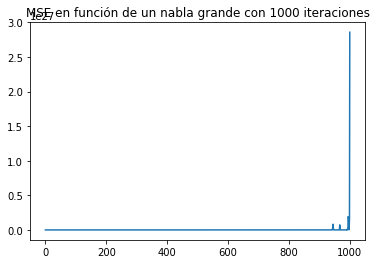

In [253]:
import matplotlib.pyplot as plt
betaSGD,sgd_errors = train_SGD(0.1,1000,X_train,Y_train)
#se intento con un coeficiente 0.5 y tiró error
plt.plot(sgd_errors)
plt.title("MSE en función de un nabla grande con 1000 iteraciones")

Text(0.5,1,'MSE en función de un nabla mediano con 1000 iteraciones')

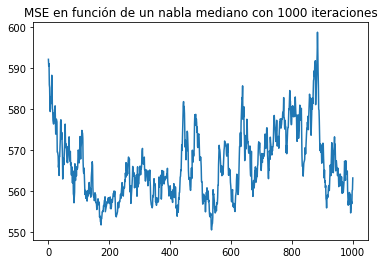

In [248]:
betaSGD2,sgd_errors2 = train_SGD(0.001,1000,X_train,Y_train)
plt.plot(sgd_errors2)
plt.title("MSE en función de un nabla mediano con 1000 iteraciones")

CPU times: user 40.8 ms, sys: 8 µs, total: 40.8 ms
Wall time: 40 ms


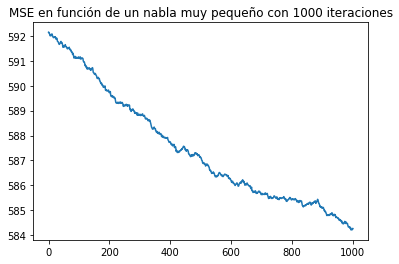

In [249]:
%%time 
betaSGD3,sgd_errors3 = train_SGD(0.00001,1000,X_train,Y_train)
plt.plot(sgd_errors3)
plt.title("MSE en función de un nabla muy pequeño con 1000 iteraciones")

Text(0.5,1,'MSE en función de un nabla pequeño con una mayor cantidad de iteraciones')

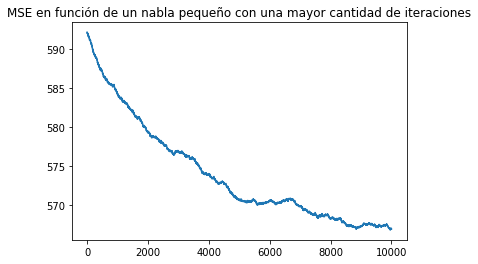

In [250]:
betaSGD4,sgd_errors4 = train_SGD(0.00001,10000,X_train,Y_train) #mismo nabla, mas iteraciones
plt.plot(sgd_errors4)
plt.title("MSE en función de un nabla pequeño con una mayor cantidad de iteraciones")

Text(0.5,1,'MSE en función de un nabla muy pequeño con 1000 iteraciones')

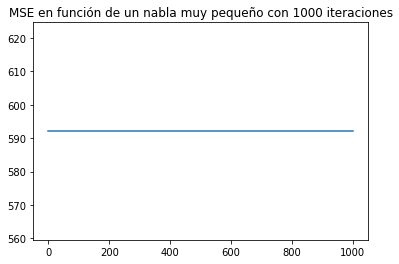

In [251]:
betaSGD5,sgd_errors5 = train_SGD(0.0000000000000000001,1000,X_train,Y_train)
plt.plot(sgd_errors5)
plt.title("MSE en función de un nabla muy pequeño con 1000 iteraciones")

Comparando los tiempos arrojados por la cell magic *%%time* se tiene que el método analítico es más rápido $3[ms]$ vs $40[ms]$ aproximadamente. 

Ahora se compararán los coeficientes obtenidos de forma analítica v/s los coeficientes obtenidos por el método SGD

In [256]:
print("Coeficientes Analíticos: \n")
print(beta)
print("\nMSE de los coeficientes analíticos: ")
print(mse(X_train,beta,Y_train))
print("\nCoeficientes SGD: \n")
print(betaSGD3)

Coeficientes Analíticos: 

[-0.92041113  1.08098058  0.14296712  0.68220346 -2.06009246  2.67064141
  0.02112063 -3.10444805  2.65878654 -2.07589814 -2.06215593  0.85664044
 -3.74867982]

MSE de los coeficientes analíticos: 
529.6251400575698

Coeficientes SGD: 
[-0.06484462  0.04847817 -0.07594423  0.05617018 -0.07333148  0.12870533
 -0.05720425  0.03990943 -0.05964469 -0.07887868 -0.07314546  0.04226308
 -0.13211096]


Como se puede observar, los coeficientes difieren unos con otros, la principal razón puede ser porque se obvió el coeficiente de posición, por lo que se agregará ahora 1 dimensión extra a los atributos para considerar este coeficiente 

In [267]:
X_copia = X_train
num = X_copia.shape[0]
dim = []
for i in range(num):
    dim.append([1])
dim = np.array(dim)
X_copia = np.append(X_copia,dim,axis=1)

In [269]:
print("Los parámetros son: ")
beta2 = prediccion(X_copia,Y_train)
print(beta2)
print("El MSE es: ")
print(mse(X_copia,beta2,Y_train))


Los parámetros son: 
[-9.20411128e-01  1.08098058e+00  1.42967124e-01  6.82203460e-01
 -2.06009246e+00  2.67064141e+00  2.11206306e-02 -3.10444805e+00
  2.65878654e+00 -2.07589814e+00 -2.06215593e+00  8.56640436e-01
 -3.74867982e+00  2.25328063e+01]
El MSE es: 
21.8977792176875


Text(0.5,1,'MSE en función de un nabla muy pequeño con 1000 iteraciones')

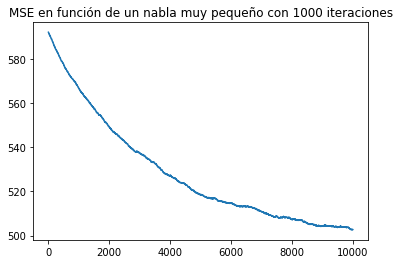

In [277]:
betaSGD6,sgd_errors6 = train_SGD(0.00001,10000,X_copia,Y_train)
plt.plot(sgd_errors6)
plt.title("MSE en función de un nabla pequeño con 10000 iteraciones")

Text(0.5,1,'MSE en función de un nabla muy pequeño con 10000 iteraciones')

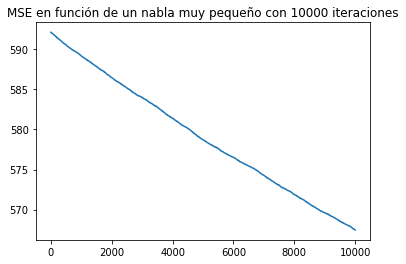

In [278]:
betaSGD7,sgd_errors7 = train_SGD(0.000001,10000,X_copia,Y_train) #nabla_anterior/10
plt.plot(sgd_errors7)
plt.title("MSE en función de un nabla muy pequeño con 10000 iteraciones")

In [275]:
print("Coeficientes analíticos: \n")
print(beta2)
print("\nEl MSE Analítico es: ")
print(mse(X_copia,beta2,Y_train))
print("\nCoeficientes SGD: \n")
print(betaSGD6)

Coeficientes analíticos: 

[-9.20411128e-01  1.08098058e+00  1.42967124e-01  6.82203460e-01
 -2.06009246e+00  2.67064141e+00  2.11206306e-02 -3.10444805e+00
  2.65878654e+00 -2.07589814e+00 -2.06215593e+00  8.56640436e-01
 -3.74867982e+00  2.25328063e+01]

El MSE Analítico es: 
21.8977792176875

Coeficientes SGD: 

[-0.2290531   0.24055355 -0.28864626  0.09294374 -0.25630756  0.38748858
 -0.23237038  0.16403236 -0.22352879 -0.27590087 -0.31005461  0.19304933
 -0.43554347  1.49985772]


Agregando una dimensión extra se puede ver que el MSE analítico disminuyó considerablemente y en el método SGD presenta una curva más pura, si es que puede decirse así, aunque ahora la diferencia de los MSE es muchísimo mas grande que antes, lamentablemente no tenemos una explicación para este suceso.

Se encuentra interesante el hecho de que variar solamente un orden de magnitud en esta última parte se cambia de una reducción exponencial a una lineal.

> f) Varíe la tasa de aprendizaje $\eta \in [0,1]$ del algoritmo SGD del punto d), compare los resultados entre sí y con la solución óptima encontrada en c). Comente

Como se puede ver gráficos presentados anteriormente se puede ver como un valor distinto de $\eta$ afecta considerablemente el error en las iteraciones: 

* Si es *grande : $0.1$* se puede ver como el error diverge ya que los saltos son muy grandes.

* Si es *mediano: $0.001$* se puede ver como oscila entre subidas y bajadas.

* Si es *pequeño: $0.00001$* se puede ver como la tendencia del error es bajar y baja aún mas al aumentar las iteraciones.

* Si es *muy pequeño $0.0000000000000000001$* no se observa ningún cambio por lo que no resulta útil ya que es practicamente multiplicar por $0$ y eso genera que $\beta$ no se actualice en ninguna iteración.

Es importante utilizar un valor pequeño de $\eta$ pero no muy pequeño para ir minimizando los errores en cada iteración.